## Hyperparam search

In [1]:
from main import Agent
from main import Environment

from bokeh.io import output_notebook
import bokeh.plotting as plt
import numpy as np

import optuna

import logging
from pprint import pprint


output_notebook()

Loading BokehJS ...

In [5]:
SAMPLES = 3
SEARCH_CALLS = 30

OBJ_LOG = []


def objective(summary):
    """
    Accepts output from metrics.Stats.summary_metrics()
    """
    
    if summary['issues_solved_rate'] != 0:
        steady_solve_auc = summary['elapsed_time'] * summary['issues_solved'] / 2
        auc_improvement = summary['issues_solved_auc'] / steady_solve_auc  # improvement/t
        reasonable_solved = summary['elapsed_time'] / summary['issues_solved']
        poly_stability = np.sqrt(summary['poly_complexity_var']) / 10  # pop stability
        confidence_var = summary['confidence_var']

        fitness =  auc_improvement + reasonable_solved + poly_stability + confidence_var

        OBJ_LOG.append({
            'auc_improvement': round(auc_improvement, 3),
            'reasonable_solved': round(reasonable_solved, 3),
            'poly_stability': round(poly_stability, 3),
            'confidence_var': round(confidence_var, 3),
        })
        
        return fitness
    else:
        return 0


def run(trial):
    measures = []

    kwargs = {
        'max_agents': 200,
        'num_issues': 5,
        'gov_term': trial.suggest_int('gov_term', 100, 500),
        'issue_solving_disagreement': trial.suggest_float('issue_solving_disagreement', 0.01, 5),
        'agent_convo_disagreement': trial.suggest_float('agent_convo_disagreement', 0.1, 0.5),
        'agent_confidence_gain': trial.suggest_float('agent_confidence_gain', 0.01, 0.2),
        'agent_evolve_rate': trial.suggest_float('agent_evolve_rate', 0.1, 0.5),
        'agent_poly_degree': 6,
    }

    for seed in range(SAMPLES):
        env = Environment(seed=seed, **kwargs)

        ticks = 10_000
        env.run(ticks=ticks)
        summary = env.stats.summary_metrics()
        measures.append(objective(summary))
    spread = round(np.std(measures) / np.mean(measures), 3)
    if spread > 0.1:
        #loggig.warning('Big spread : {} {}', np.std(measures)/np.mean(measures), measures)
        pass
    return np.mean(measures)

study = optuna.create_study()
study.optimize(run, n_trials=SEARCH_CALLS)


for k in OBJ_LOG[0].keys():
    p = plt.figure(title=k)
    p.quad(np.histogram([o[k] for o in OBJ_LOG]))
    plt.show(p)
    print(k, [o[k] for o in OBJ_LOG])

pprint(study.best_params)

[I 2023-06-27 23:54:23,465] A new study created in memory with name: no-name-2c544155-da2c-4e6d-8947-2c1a74355691


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning:

The fit may be poorly conditioned



Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 00:04:30,430] Trial 0 finished with value: 2.4763278223689373 and parameters: {'gov_term': 352, 'issue_solving_disagreement': 0.6255097654616425, 'agent_convo_disagreement': 0.3414845861452295, 'agent_confidence_gain': 0.043257755728418265, 'agent_evolve_rate': 0.21509439654231693}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 00:14:23,389] Trial 1 finished with value: 2.793622689571768 and parameters: {'gov_term': 208, 'issue_solving_disagreement': 4.228148218846487, 'agent_convo_disagreement': 0.3386854168746404, 'agent_confidence_gain': 0.10833494922250864, 'agent_evolve_rate': 0.3993743125011001}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 00:24:23,538] Trial 2 finished with value: 374.2527265221308 and parameters: {'gov_term': 103, 'issue_solving_disagreement': 2.0850834473988407, 'agent_convo_disagreement': 0.48838526209907507, 'agent_confidence_gain': 0.10082936881008553, 'agent_evolve_rate': 0.16781045187329163}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 00:34:22,839] Trial 3 finished with value: 2.8057678857071955 and parameters: {'gov_term': 282, 'issue_solving_disagreement': 4.4473172226284605, 'agent_convo_disagreement': 0.3427589101880557, 'agent_confidence_gain': 0.1343562170187301, 'agent_evolve_rate': 0.28979402210723204}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 00:44:19,288] Trial 4 finished with value: 3.138414587419803 and parameters: {'gov_term': 467, 'issue_solving_disagreement': 2.6978656174462645, 'agent_convo_disagreement': 0.15456768025639067, 'agent_confidence_gain': 0.18085749347955424, 'agent_evolve_rate': 0.30137709752124753}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 00:54:10,530] Trial 5 finished with value: 2.719580679584091 and parameters: {'gov_term': 422, 'issue_solving_disagreement': 2.0222986963711573, 'agent_convo_disagreement': 0.4603882411893637, 'agent_confidence_gain': 0.05113743097203477, 'agent_evolve_rate': 0.38204713756621256}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 01:04:08,961] Trial 6 finished with value: 2.7161520405867807 and parameters: {'gov_term': 124, 'issue_solving_disagreement': 1.0753878251257705, 'agent_convo_disagreement': 0.4974761471941235, 'agent_confidence_gain': 0.08989254097114904, 'agent_evolve_rate': 0.3889451325251133}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 01:14:01,579] Trial 7 finished with value: 2.943454767547239 and parameters: {'gov_term': 359, 'issue_solving_disagreement': 4.028811484979147, 'agent_convo_disagreement': 0.20883384915653103, 'agent_confidence_gain': 0.14148604623523783, 'agent_evolve_rate': 0.39110032155631314}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 01:23:55,071] Trial 8 finished with value: 521.9673492118087 and parameters: {'gov_term': 113, 'issue_solving_disagreement': 2.718852257972875, 'agent_convo_disagreement': 0.1502367505246212, 'agent_confidence_gain': 0.189289285727134, 'agent_evolve_rate': 0.10819157646972669}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 01:33:42,357] Trial 9 finished with value: 2.7758095303440213 and parameters: {'gov_term': 394, 'issue_solving_disagreement': 2.4040151863046346, 'agent_convo_disagreement': 0.4325281947382531, 'agent_confidence_gain': 0.07100754955256548, 'agent_evolve_rate': 0.30663100111499936}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 01:43:38,883] Trial 10 finished with value: 7.977707351048253 and parameters: {'gov_term': 276, 'issue_solving_disagreement': 0.15268099485151954, 'agent_convo_disagreement': 0.26248598901490433, 'agent_confidence_gain': 0.01258871165671787, 'agent_evolve_rate': 0.4909522003613002}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 01:53:35,748] Trial 11 finished with value: 2.4992448903555666 and parameters: {'gov_term': 207, 'issue_solving_disagreement': 0.44451723098677953, 'agent_convo_disagreement': 0.3964199973237722, 'agent_confidence_gain': 0.04832249461257688, 'agent_evolve_rate': 0.22230596501853736}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 02:03:35,771] Trial 12 finished with value: 9.89096412198618 and parameters: {'gov_term': 215, 'issue_solving_disagreement': 0.08206278081443508, 'agent_convo_disagreement': 0.4024666582284561, 'agent_confidence_gain': 0.03403348049163993, 'agent_evolve_rate': 0.20869107852015034}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 02:13:32,549] Trial 13 finished with value: 2.480303864173336 and parameters: {'gov_term': 327, 'issue_solving_disagreement': 0.920462839555432, 'agent_convo_disagreement': 0.38658533513928367, 'agent_confidence_gain': 0.047193574294176865, 'agent_evolve_rate': 0.21572258733349248}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 02:23:39,432] Trial 14 finished with value: 55.022171369257016 and parameters: {'gov_term': 357, 'issue_solving_disagreement': 1.053459292207493, 'agent_convo_disagreement': 0.3031835983300802, 'agent_confidence_gain': 0.013214798175544551, 'agent_evolve_rate': 0.13929968103231233}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 02:33:33,772] Trial 15 finished with value: 2.7733491393583343 and parameters: {'gov_term': 328, 'issue_solving_disagreement': 1.0932201659666263, 'agent_convo_disagreement': 0.3705901315187902, 'agent_confidence_gain': 0.07065794332079062, 'agent_evolve_rate': 0.21640620657303486}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 02:43:29,098] Trial 16 finished with value: 471.7154836485067 and parameters: {'gov_term': 490, 'issue_solving_disagreement': 0.6507520178302904, 'agent_convo_disagreement': 0.30202750650339727, 'agent_confidence_gain': 0.03377911174784345, 'agent_evolve_rate': 0.16434788996975158}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 02:53:27,959] Trial 17 finished with value: 2.591348251590889 and parameters: {'gov_term': 418, 'issue_solving_disagreement': 1.5352743335834265, 'agent_convo_disagreement': 0.42607099072315013, 'agent_confidence_gain': 0.06880734647320524, 'agent_evolve_rate': 0.2427147542887042}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 03:03:25,893] Trial 18 finished with value: 187.1329787981932 and parameters: {'gov_term': 250, 'issue_solving_disagreement': 0.6354249711044996, 'agent_convo_disagreement': 0.3650296161762842, 'agent_confidence_gain': 0.030958010566690168, 'agent_evolve_rate': 0.16598175391733155}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 03:13:28,754] Trial 19 finished with value: 743.9680618460342 and parameters: {'gov_term': 318, 'issue_solving_disagreement': 1.657190737148996, 'agent_convo_disagreement': 0.274808414671432, 'agent_confidence_gain': 0.05770550761099612, 'agent_evolve_rate': 0.10023746414347362}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 03:23:52,545] Trial 20 finished with value: 3890.178679351467 and parameters: {'gov_term': 361, 'issue_solving_disagreement': 0.06784891089987655, 'agent_convo_disagreement': 0.3346946872314873, 'agent_confidence_gain': 0.0836162878115301, 'agent_evolve_rate': 0.2611097780706209}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 03:33:54,756] Trial 21 finished with value: 2.524562593303821 and parameters: {'gov_term': 188, 'issue_solving_disagreement': 0.5251973084334168, 'agent_convo_disagreement': 0.3976915317571266, 'agent_confidence_gain': 0.04805298338752857, 'agent_evolve_rate': 0.2055034135426249}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 03:43:52,601] Trial 22 finished with value: 2.574456877257614 and parameters: {'gov_term': 168, 'issue_solving_disagreement': 0.6212083915073207, 'agent_convo_disagreement': 0.38843733410434916, 'agent_confidence_gain': 0.04359902480913086, 'agent_evolve_rate': 0.24363213149633756}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 03:53:43,738] Trial 23 finished with value: 2.4975575497506854 and parameters: {'gov_term': 248, 'issue_solving_disagreement': 1.3226943037020606, 'agent_convo_disagreement': 0.4308154309666571, 'agent_confidence_gain': 0.02383315136285395, 'agent_evolve_rate': 0.19907048856164736}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 04:03:42,211] Trial 24 finished with value: 3.2715924502687983 and parameters: {'gov_term': 273, 'issue_solving_disagreement': 1.3968033372498616, 'agent_convo_disagreement': 0.43935597359669715, 'agent_confidence_gain': 0.022026038806249256, 'agent_evolve_rate': 0.17940513867755875}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 04:13:42,539] Trial 25 finished with value: 136.6126472397352 and parameters: {'gov_term': 245, 'issue_solving_disagreement': 0.9718593044253915, 'agent_convo_disagreement': 0.46073395298701164, 'agent_confidence_gain': 0.026833978822437266, 'agent_evolve_rate': 0.13237370065380727}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 04:23:41,498] Trial 26 finished with value: 2.7602837549655685 and parameters: {'gov_term': 307, 'issue_solving_disagreement': 1.325230383905332, 'agent_convo_disagreement': 0.36148020065804354, 'agent_confidence_gain': 0.015001904556068164, 'agent_evolve_rate': 0.2657313226517291}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 04:33:38,600] Trial 27 finished with value: 6.732377492385921 and parameters: {'gov_term': 341, 'issue_solving_disagreement': 1.7523525454890412, 'agent_convo_disagreement': 0.419648906551238, 'agent_confidence_gain': 0.03885488330982474, 'agent_evolve_rate': 0.19429142686248208}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 04:43:33,769] Trial 28 finished with value: 2.756851130682753 and parameters: {'gov_term': 240, 'issue_solving_disagreement': 0.8869805964828441, 'agent_convo_disagreement': 0.455438717392229, 'agent_confidence_gain': 0.056446745239998194, 'agent_evolve_rate': 0.1840039780767083}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 04:53:26,987] Trial 29 finished with value: 2.518211936737732 and parameters: {'gov_term': 388, 'issue_solving_disagreement': 0.3310734934522014, 'agent_convo_disagreement': 0.3296993677933453, 'agent_confidence_gain': 0.02306790058484774, 'agent_evolve_rate': 0.23515281842245553}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 05:03:20,384] Trial 30 finished with value: 315.4846925889328 and parameters: {'gov_term': 151, 'issue_solving_disagreement': 0.863018175791291, 'agent_convo_disagreement': 0.37318637802999716, 'agent_confidence_gain': 0.06151089537925493, 'agent_evolve_rate': 0.13563961148621323}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 05:13:18,076] Trial 31 finished with value: 2.5450570146723055 and parameters: {'gov_term': 204, 'issue_solving_disagreement': 0.387660461081085, 'agent_convo_disagreement': 0.4073017863629939, 'agent_confidence_gain': 0.0443749083126627, 'agent_evolve_rate': 0.2135253006468984}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 05:23:14,382] Trial 32 finished with value: 2.5638595279870624 and parameters: {'gov_term': 220, 'issue_solving_disagreement': 0.373951765509333, 'agent_convo_disagreement': 0.39117688011270724, 'agent_confidence_gain': 0.04111962779103458, 'agent_evolve_rate': 0.22788476828042625}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 05:33:19,310] Trial 33 finished with value: 3.726018466883271 and parameters: {'gov_term': 291, 'issue_solving_disagreement': 1.3406554770991859, 'agent_convo_disagreement': 0.34289881542039863, 'agent_confidence_gain': 0.02759016496480521, 'agent_evolve_rate': 0.18617401644843135}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 05:43:30,003] Trial 34 finished with value: 18.24620102862596 and parameters: {'gov_term': 259, 'issue_solving_disagreement': 0.7520006095895924, 'agent_convo_disagreement': 0.4759307512237481, 'agent_confidence_gain': 0.01034465944602618, 'agent_evolve_rate': 0.25817597048126606}. Best is trial 0 with value: 2.4763278223689373.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

/tmp/ipykernel_20056/3405941241.py:54: RuntimeWarning:

invalid value encountered in scalar divide

[I 2023-06-28 05:53:48,165] Trial 35 finished with value: 0.0 and parameters: {'gov_term': 299, 'issue_solving_disagreement': 0.014033302873606712, 'agent_convo_disagreement': 0.42076160993064116, 'agent_confidence_gain': 0.050397954422778245, 'agent_evolve_rate': 0.27641053625928247}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 06:04:08,871] Trial 36 finished with value: 0.0 and parameters: {'gov_term': 301, 'issue_solving_disagreement': 0.05155375491422052, 'agent_convo_disagreement': 0.48057349405011657, 'agent_confidence_gain': 0.05497242397033796, 'agent_evolve_rate': 0.2846750212974335}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 06:14:25,300] Trial 37 finished with value: 0.0 and parameters: {'gov_term': 300, 'issue_solving_disagreement': 0.04383374234523748, 'agent_convo_disagreement': 0.4989342394431533, 'agent_confidence_gain': 0.08055821120057521, 'agent_evolve_rate': 0.29640391958817586}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 06:24:40,583] Trial 38 finished with value: 3705.103028398093 and parameters: {'gov_term': 297, 'issue_solving_disagreement': 0.11095908795471421, 'agent_convo_disagreement': 0.49185890218918205, 'agent_confidence_gain': 0.10492373368304207, 'agent_evolve_rate': 0.2968765114403006}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 06:34:55,126] Trial 39 finished with value: 0.0 and parameters: {'gov_term': 383, 'issue_solving_disagreement': 0.03145581174006369, 'agent_convo_disagreement': 0.4996967864281347, 'agent_confidence_gain': 0.08282721220087146, 'agent_evolve_rate': 0.3184538984173236}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 06:45:11,956] Trial 40 finished with value: 0.0 and parameters: {'gov_term': 440, 'issue_solving_disagreement': 0.037791032955323545, 'agent_convo_disagreement': 0.4806565457269117, 'agent_confidence_gain': 0.07621130342214383, 'agent_evolve_rate': 0.3250029854993177}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 06:55:31,728] Trial 41 finished with value: 0.0 and parameters: {'gov_term': 446, 'issue_solving_disagreement': 0.03544694803314995, 'agent_convo_disagreement': 0.49907193124108973, 'agent_confidence_gain': 0.08315089907693471, 'agent_evolve_rate': 0.32343525377363924}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 07:05:49,429] Trial 42 finished with value: 991.2517768621866 and parameters: {'gov_term': 382, 'issue_solving_disagreement': 0.23026335696837277, 'agent_convo_disagreement': 0.47743956237200336, 'agent_confidence_gain': 0.09156896082002738, 'agent_evolve_rate': 0.3242512252589489}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 07:16:09,380] Trial 43 finished with value: 0.0 and parameters: {'gov_term': 449, 'issue_solving_disagreement': 0.012754838866100484, 'agent_convo_disagreement': 0.479267998963943, 'agent_confidence_gain': 0.07523160273253483, 'agent_evolve_rate': 0.34472843118599994}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 07:26:16,113] Trial 44 finished with value: 198.69945983175046 and parameters: {'gov_term': 407, 'issue_solving_disagreement': 0.38408072152490047, 'agent_convo_disagreement': 0.455041997580579, 'agent_confidence_gain': 0.06202477342798366, 'agent_evolve_rate': 0.281589886756089}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 07:36:21,067] Trial 45 finished with value: 5.104550893422785 and parameters: {'gov_term': 439, 'issue_solving_disagreement': 0.31673737574044686, 'agent_convo_disagreement': 0.4698581466063553, 'agent_confidence_gain': 0.09479317453596214, 'agent_evolve_rate': 0.2828438218736671}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 07:46:28,912] Trial 46 finished with value: 12.711888714233808 and parameters: {'gov_term': 469, 'issue_solving_disagreement': 0.540156721230434, 'agent_convo_disagreement': 0.4972050624944316, 'agent_confidence_gain': 0.11359022539740324, 'agent_evolve_rate': 0.35845420002023703}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 07:56:43,331] Trial 47 finished with value: 246.20351280518932 and parameters: {'gov_term': 375, 'issue_solving_disagreement': 0.2694098555728191, 'agent_convo_disagreement': 0.44735014907447157, 'agent_confidence_gain': 0.07897559216195814, 'agent_evolve_rate': 0.31149489673031483}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 08:07:28,484] Trial 48 finished with value: 0.0 and parameters: {'gov_term': 275, 'issue_solving_disagreement': 0.013676475404378453, 'agent_convo_disagreement': 0.48252411800262957, 'agent_confidence_gain': 0.06741504028549325, 'agent_evolve_rate': 0.28599113400286263}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 08:19:32,324] Trial 49 finished with value: 7.573313046970699 and parameters: {'gov_term': 500, 'issue_solving_disagreement': 0.6926581608901504, 'agent_convo_disagreement': 0.46558730397607573, 'agent_confidence_gain': 0.05630560233169233, 'agent_evolve_rate': 0.3397174172426134}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 08:32:06,053] Trial 50 finished with value: 916.7633200724867 and parameters: {'gov_term': 411, 'issue_solving_disagreement': 0.26068280286838247, 'agent_convo_disagreement': 0.44468331720079834, 'agent_confidence_gain': 0.07455010653352084, 'agent_evolve_rate': 0.3137617013355367}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 08:45:08,183] Trial 51 finished with value: 0.0 and parameters: {'gov_term': 442, 'issue_solving_disagreement': 0.012054417057488156, 'agent_convo_disagreement': 0.49900615100588425, 'agent_confidence_gain': 0.08431174571312555, 'agent_evolve_rate': 0.32614660376780236}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 09:02:04,966] Trial 52 finished with value: 26.742761467344696 and parameters: {'gov_term': 471, 'issue_solving_disagreement': 0.5162185330375417, 'agent_convo_disagreement': 0.4990992209254494, 'agent_confidence_gain': 0.08473525232962285, 'agent_evolve_rate': 0.3057140011814202}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 09:13:46,976] Trial 53 finished with value: 788.9176623339308 and parameters: {'gov_term': 343, 'issue_solving_disagreement': 0.19844533219121357, 'agent_convo_disagreement': 0.48124522186320196, 'agent_confidence_gain': 0.06642962643515031, 'agent_evolve_rate': 0.36770986242135956}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 09:24:46,316] Trial 54 finished with value: 121.81561755389147 and parameters: {'gov_term': 313, 'issue_solving_disagreement': 0.20846905195615242, 'agent_convo_disagreement': 0.46469843953670437, 'agent_confidence_gain': 0.07656808179504349, 'agent_evolve_rate': 0.289169163799328}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 09:35:42,785] Trial 55 finished with value: 34.90032364541541 and parameters: {'gov_term': 430, 'issue_solving_disagreement': 0.47786838269052534, 'agent_convo_disagreement': 0.44494940564734264, 'agent_confidence_gain': 0.09765176118137532, 'agent_evolve_rate': 0.32381785257995827}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 11:16:07,412] Trial 56 finished with value: 5.296474801073733 and parameters: {'gov_term': 369, 'issue_solving_disagreement': 0.721198275472039, 'agent_convo_disagreement': 0.4897840915631484, 'agent_confidence_gain': 0.05430771032998874, 'agent_evolve_rate': 0.27368015971086807}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 11:27:26,981] Trial 57 finished with value: 0.0 and parameters: {'gov_term': 456, 'issue_solving_disagreement': 0.029507689893713496, 'agent_convo_disagreement': 0.4200355895910153, 'agent_confidence_gain': 0.06314717589357066, 'agent_evolve_rate': 0.30205546049033755}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 11:38:32,056] Trial 58 finished with value: 32.58006551384125 and parameters: {'gov_term': 334, 'issue_solving_disagreement': 0.48395815050881646, 'agent_convo_disagreement': 0.46677880759314466, 'agent_confidence_gain': 0.0880685692543092, 'agent_evolve_rate': 0.296983085185198}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 11:49:52,929] Trial 59 finished with value: 898.7121140841246 and parameters: {'gov_term': 479, 'issue_solving_disagreement': 0.21494254361614157, 'agent_convo_disagreement': 0.4840724999780487, 'agent_confidence_gain': 0.07922925331565964, 'agent_evolve_rate': 0.2522363762186527}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 12:00:47,712] Trial 60 finished with value: 3.973052797530677 and parameters: {'gov_term': 403, 'issue_solving_disagreement': 0.7963242093549694, 'agent_convo_disagreement': 0.4704838545601816, 'agent_confidence_gain': 0.07236113993436126, 'agent_evolve_rate': 0.27226767852015327}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 12:11:06,601] Trial 61 finished with value: 0.0 and parameters: {'gov_term': 442, 'issue_solving_disagreement': 0.010842122851742303, 'agent_convo_disagreement': 0.4832323784085908, 'agent_confidence_gain': 0.06965118350814997, 'agent_evolve_rate': 0.3424848764172967}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 12:21:54,135] Trial 62 finished with value: 2144.901284580785 and parameters: {'gov_term': 456, 'issue_solving_disagreement': 0.15495856439136596, 'agent_convo_disagreement': 0.4529471944923086, 'agent_confidence_gain': 0.053016760957504495, 'agent_evolve_rate': 0.335667697802311}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 12:32:26,535] Trial 63 finished with value: 3.3319263655214115 and parameters: {'gov_term': 394, 'issue_solving_disagreement': 0.5788185332176841, 'agent_convo_disagreement': 0.4337282689369973, 'agent_confidence_gain': 0.07798546076976014, 'agent_evolve_rate': 0.35718826298965084}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 12:43:01,053] Trial 64 finished with value: 96.11299992022201 and parameters: {'gov_term': 430, 'issue_solving_disagreement': 0.36202328864412375, 'agent_convo_disagreement': 0.49020112281297157, 'agent_confidence_gain': 0.09061005531106545, 'agent_evolve_rate': 0.3199579246876168}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 12:53:45,239] Trial 65 finished with value: 0.0 and parameters: {'gov_term': 456, 'issue_solving_disagreement': 0.01627640683390738, 'agent_convo_disagreement': 0.47407852594284794, 'agent_confidence_gain': 0.049775017413809214, 'agent_evolve_rate': 0.3080220596774654}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 13:04:24,098] Trial 66 finished with value: 4.489243535487284 and parameters: {'gov_term': 324, 'issue_solving_disagreement': 0.45321830212462766, 'agent_convo_disagreement': 0.4992326889491775, 'agent_confidence_gain': 0.06145585867043853, 'agent_evolve_rate': 0.2957001893293413}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 13:14:55,339] Trial 67 finished with value: 4.065757577466086 and parameters: {'gov_term': 284, 'issue_solving_disagreement': 1.1270166075369186, 'agent_convo_disagreement': 0.4609357319322353, 'agent_confidence_gain': 0.07391468230103146, 'agent_evolve_rate': 0.27518094664245635}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 13:24:06,660] Trial 68 finished with value: 481.9928896414796 and parameters: {'gov_term': 487, 'issue_solving_disagreement': 0.1918402533192625, 'agent_convo_disagreement': 0.4361356005505753, 'agent_confidence_gain': 0.08542694565389845, 'agent_evolve_rate': 0.3817404123256313}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 15:42:26,691] Trial 69 finished with value: 3.5562451601335474 and parameters: {'gov_term': 349, 'issue_solving_disagreement': 0.6358967280343266, 'agent_convo_disagreement': 0.4524930546022045, 'agent_confidence_gain': 0.09840428525658462, 'agent_evolve_rate': 0.33450411659570783}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 16:01:48,458] Trial 70 finished with value: 883.4530561403539 and parameters: {'gov_term': 265, 'issue_solving_disagreement': 0.14170331129872332, 'agent_convo_disagreement': 0.4840150330316985, 'agent_confidence_gain': 0.06817574503672101, 'agent_evolve_rate': 0.3140313647939963}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 16:27:14,235] Trial 71 finished with value: 0.0 and parameters: {'gov_term': 299, 'issue_solving_disagreement': 0.01621825986037972, 'agent_convo_disagreement': 0.48027955881798545, 'agent_confidence_gain': 0.08023093260627347, 'agent_evolve_rate': 0.2828123237732903}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 16:48:37,597] Trial 72 finished with value: 2.700396643324513 and parameters: {'gov_term': 228, 'issue_solving_disagreement': 0.30448844730482816, 'agent_convo_disagreement': 0.4726889303422342, 'agent_confidence_gain': 0.06691315414619155, 'agent_evolve_rate': 0.29121968402247456}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 17:10:24,171] Trial 73 finished with value: 1391.0414756315356 and parameters: {'gov_term': 280, 'issue_solving_disagreement': 0.14296703773451475, 'agent_convo_disagreement': 0.4857788743578697, 'agent_confidence_gain': 0.05972134231998434, 'agent_evolve_rate': 0.2525238791642782}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 17:22:06,202] Trial 74 finished with value: 3.98007541434286 and parameters: {'gov_term': 308, 'issue_solving_disagreement': 0.3951762170881849, 'agent_convo_disagreement': 0.4167053419595437, 'agent_confidence_gain': 0.07133416342273607, 'agent_evolve_rate': 0.26195729926591227}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 17:35:57,845] Trial 75 finished with value: 23.94080534082976 and parameters: {'gov_term': 264, 'issue_solving_disagreement': 0.2973190582065871, 'agent_convo_disagreement': 0.4607938912084456, 'agent_confidence_gain': 0.052131542551997465, 'agent_evolve_rate': 0.30208494431410543}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 17:47:08,377] Trial 76 finished with value: 912.2566605968677 and parameters: {'gov_term': 418, 'issue_solving_disagreement': 0.1424571403640357, 'agent_convo_disagreement': 0.4423402614587726, 'agent_confidence_gain': 0.06500270240669218, 'agent_evolve_rate': 0.34803536171993527}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 17:58:10,077] Trial 77 finished with value: 2.4177797598559194 and parameters: {'gov_term': 234, 'issue_solving_disagreement': 0.5950643722482921, 'agent_convo_disagreement': 0.48705232367125184, 'agent_confidence_gain': 0.03780126831186476, 'agent_evolve_rate': 0.3260858112605833}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 18:09:23,982] Trial 78 finished with value: 2.9273003541403706 and parameters: {'gov_term': 286, 'issue_solving_disagreement': 0.8194816481956371, 'agent_convo_disagreement': 0.4730143549266502, 'agent_confidence_gain': 0.08134405175113829, 'agent_evolve_rate': 0.28608301132554426}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 18:22:03,329] Trial 79 finished with value: 3.1012783446546694 and parameters: {'gov_term': 254, 'issue_solving_disagreement': 0.4356277900294472, 'agent_convo_disagreement': 0.49662868229376744, 'agent_confidence_gain': 0.058380425514228854, 'agent_evolve_rate': 0.2716887699920671}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 18:33:33,188] Trial 80 finished with value: 2463.4675728344814 and parameters: {'gov_term': 275, 'issue_solving_disagreement': 0.10465665033847169, 'agent_convo_disagreement': 0.4528232358189757, 'agent_confidence_gain': 0.09292787367524454, 'agent_evolve_rate': 0.31606601567384746}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 18:44:26,646] Trial 81 finished with value: 0.0 and parameters: {'gov_term': 438, 'issue_solving_disagreement': 0.025117347924703055, 'agent_convo_disagreement': 0.4958206311654931, 'agent_confidence_gain': 0.08532306175218068, 'agent_evolve_rate': 0.32676850071181296}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 18:55:32,894] Trial 82 finished with value: 680.7682170760963 and parameters: {'gov_term': 449, 'issue_solving_disagreement': 0.255276470019206, 'agent_convo_disagreement': 0.4772164665991688, 'agent_confidence_gain': 0.07451814480677363, 'agent_evolve_rate': 0.327891988697313}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 19:06:46,396] Trial 83 finished with value: 0.0 and parameters: {'gov_term': 428, 'issue_solving_disagreement': 0.013197834945926723, 'agent_convo_disagreement': 0.4910262386499838, 'agent_confidence_gain': 0.08493924356127304, 'agent_evolve_rate': 0.3077610448192048}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 19:18:06,436] Trial 84 finished with value: 68.02104875235763 and parameters: {'gov_term': 362, 'issue_solving_disagreement': 0.34203780972455966, 'agent_convo_disagreement': 0.4632464776217316, 'agent_confidence_gain': 0.08876896948355852, 'agent_evolve_rate': 0.3472038582015232}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 19:29:18,374] Trial 85 finished with value: 4471.0517499367825 and parameters: {'gov_term': 469, 'issue_solving_disagreement': 0.16155501064931624, 'agent_convo_disagreement': 0.4990153428509339, 'agent_confidence_gain': 0.07813911807943764, 'agent_evolve_rate': 0.29394750120353025}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 19:40:37,194] Trial 86 finished with value: 27.74224274413969 and parameters: {'gov_term': 321, 'issue_solving_disagreement': 0.4943390540925662, 'agent_convo_disagreement': 0.4771502059032691, 'agent_confidence_gain': 0.07045947623524292, 'agent_evolve_rate': 0.3339557831841979}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 19:52:04,091] Trial 87 finished with value: 3373.8469859817383 and parameters: {'gov_term': 395, 'issue_solving_disagreement': 0.2671709755563966, 'agent_convo_disagreement': 0.4885839325476938, 'agent_confidence_gain': 0.046476784281806335, 'agent_evolve_rate': 0.31231795267944185}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 20:03:34,083] Trial 88 finished with value: 5112.378839674805 and parameters: {'gov_term': 417, 'issue_solving_disagreement': 0.11779529810345842, 'agent_convo_disagreement': 0.4292475066325844, 'agent_confidence_gain': 0.06500038452807877, 'agent_evolve_rate': 0.3181347873770781}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 20:14:45,545] Trial 89 finished with value: 3.0263261138121926 and parameters: {'gov_term': 294, 'issue_solving_disagreement': 0.7038111934100699, 'agent_convo_disagreement': 0.4586037932711482, 'agent_confidence_gain': 0.10290135108764997, 'agent_evolve_rate': 0.2995224323716582}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 20:26:21,157] Trial 90 finished with value: 42.488212178765885 and parameters: {'gov_term': 334, 'issue_solving_disagreement': 0.40581742172587487, 'agent_convo_disagreement': 0.4697226023158869, 'agent_confidence_gain': 0.07564249882094518, 'agent_evolve_rate': 0.28904767328819614}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 20:38:02,491] Trial 91 finished with value: 0.0 and parameters: {'gov_term': 458, 'issue_solving_disagreement': 0.03575144853593637, 'agent_convo_disagreement': 0.40856310273218566, 'agent_confidence_gain': 0.06250283275414395, 'agent_evolve_rate': 0.2811509219258945}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 20:49:55,651] Trial 92 finished with value: 7144.630571740436 and parameters: {'gov_term': 479, 'issue_solving_disagreement': 0.11312575922215964, 'agent_convo_disagreement': 0.4221636715534935, 'agent_confidence_gain': 0.05641943472554321, 'agent_evolve_rate': 0.30203848761182717}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 21:01:26,940] Trial 93 finished with value: 270.46657705886327 and parameters: {'gov_term': 461, 'issue_solving_disagreement': 0.24428452763632194, 'agent_convo_disagreement': 0.49960641203907485, 'agent_confidence_gain': 0.08158972349217533, 'agent_evolve_rate': 0.266696527526775}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 21:12:47,129] Trial 94 finished with value: 35.43196496965531 and parameters: {'gov_term': 449, 'issue_solving_disagreement': 0.3427102924378558, 'agent_convo_disagreement': 0.44597349139809217, 'agent_confidence_gain': 0.06350741992122753, 'agent_evolve_rate': 0.3080003060034507}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 21:24:02,391] Trial 95 finished with value: 3.9828045332052446 and parameters: {'gov_term': 440, 'issue_solving_disagreement': 0.571371750424259, 'agent_convo_disagreement': 0.4854411009696704, 'agent_confidence_gain': 0.05003091446369846, 'agent_evolve_rate': 0.3217817711582333}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 21:36:40,328] Trial 96 finished with value: 306.15510711961184 and parameters: {'gov_term': 306, 'issue_solving_disagreement': 0.10718394527836819, 'agent_convo_disagreement': 0.43681610209917854, 'agent_confidence_gain': 0.072887029555402, 'agent_evolve_rate': 0.32986911706938626}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 21:49:49,759] Trial 97 finished with value: 120.4880730288196 and parameters: {'gov_term': 449, 'issue_solving_disagreement': 0.2736308326562425, 'agent_convo_disagreement': 0.47903868073878003, 'agent_confidence_gain': 0.09537175724906014, 'agent_evolve_rate': 0.27887620302578014}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 21:58:48,714] Trial 98 finished with value: 0.0 and parameters: {'gov_term': 481, 'issue_solving_disagreement': 0.01757286267796381, 'agent_convo_disagreement': 0.46419773216186083, 'agent_confidence_gain': 0.06662129766907302, 'agent_evolve_rate': 0.3386762685119455}. Best is trial 35 with value: 0.0.


Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 10000 ticks:   0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-06-28 22:06:41,636] Trial 99 finished with value: 9.00822299859419 and parameters: {'gov_term': 423, 'issue_solving_disagreement': 0.47688863230135203, 'agent_convo_disagreement': 0.45282762082646616, 'agent_confidence_gain': 0.058338934648765314, 'agent_evolve_rate': 0.30136549634736914}. Best is trial 35 with value: 0.0.


auc_improvement [0.965, 0.965, 0.965, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.988, 0.989, 0.989, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.972, 0.972, 0.972, 0.979, 0.979, 0.979, 0.969, 1.907, 1.48, 0.968, 0.969, 0.968, 0.965, 0.974, 0.966, 0.968, 0.968, 0.874, 0.951, 0.951, 0.951, 0.896, 0.999, 0.935, 0.975, 0.975, 0.975, 0.981, 0.999, 0.999, 1.709, 1.059, 0.981, 0.981, 0.981, 0.983, 0.984, 0.983, 0.969, 0.975, 0.969, 0.947, 0.971, 0.974, 0.976, 0.976, 0.976, 0.959, 0.999, 0.999, 0.842, 0.999, 0.999, 0.977, 0.977, 0.977, 0.961, 0.961, 0.961, 0.986, 0.986, 0.985, 0.979, 0.98, 0.979, 0.978, 0.978, 0.978, 0.991, 0.94, 0.999, 1.819, 0.934, 0.887, 1.048, 1.582, 0.699, 0.252, 0.764, 0.918, 0.902, 0.918, 0.43, 0.524, 0.282, 1.31, 0.953, 1.298, 0.74, 0.89, 1.03, 0.578, 0.85, 0.351, 0.469, 0.478, 0.749, 0.812, 0.906, 1.375, 1.295, 1.467, 0.283, 0.937, 0.781, 1.553, 1.331, 1.283, 1.522, 0.6, 0.174, 0.926, 

reasonable_solved [1.036, 1.036, 1.037, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.012, 1.011, 1.011, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.029, 1.029, 1.029, 1.022, 1.021, 1.021, 1.033, 20.243, 2.104, 1.033, 1.032, 1.033, 1.036, 1.028, 1.036, 1.033, 1.033, 1.145, 1.052, 1.051, 1.052, 1.133, 1.001, 1.14, 1.026, 1.026, 1.026, 1.022, 1.001, 1.001, 1666.667, 10000.0, 1.019, 1.019, 1.019, 1.017, 1.017, 1.017, 1.033, 1.028, 1.033, 1.067, 1.034, 1.052, 1.024, 1.024, 1.025, 1.053, 1.001, 1.001, 1.317, 1.001, 1.001, 1.024, 1.024, 1.023, 1.041, 1.041, 1.041, 1.015, 1.015, 1.015, 1.021, 1.021, 1.021, 1.023, 1.023, 1.023, 1.01, 1.096, 1.001, 7.692, 1.812, 3.006, 1111.111, 10000.0, 588.235, 714.286, 1666.667, 1.089, 588.235, 1.089, 2.327, 1.92, 4.354, 1.691, 1.05, 27.778, 166.667, 322.581, 243.902, 1.754, 1.176, 12.438, 2.14, 2500.0, 243.902, 1.232, 1.104, 71.429, 625.0, 625.0, 1111.111, 1.068, 1.281, 357.14

poly_stability [0.041, 0.048, 0.037, 0.104, 0.214, 0.221, 0.055, 0.056, 0.04, 0.079, 0.078, 0.07, 0.051, 0.051, 0.04, 0.081, 0.06, 0.464, 0.184, 0.275, 0.091, 0.08, 0.42, 0.052, 0.055, 0.056, 0.04, 0.071, 0.437, 0.065, 14.54, 1.171, 1.019, 0.05, 0.051, 0.039, 0.082, 0.113, 0.046, 0.044, 0.046, 0.041, 0.055, 0.056, 0.04, 0.072, 0.043, 0.069, 0.055, 0.056, 0.04, 0.068, 0.069, 0.047, 0.055, 0.056, 0.04, 0.055, 0.056, 0.04, 0.137, 0.035, 0.055, 0.043, 0.036, 0.169, 0.145, 0.046, 0.04, 0.043, 0.039, 0.039, 0.039, 0.035, 0.055, 0.056, 0.04, 0.08, 0.531, 0.526, 2.42, 0.233, 0.055, 0.037, 0.038, 0.025, 0.065, 0.091, 0.068, 0.055, 0.056, 0.04, 0.064, 0.053, 0.039, 0.109, 0.061, 0.052, 0.189, 0.079, 0.062, 21.808, 3.637, 9.324, 0.203, 0.129, 0.216, 0.099, 0.662, 0.12, 0.125, 0.698, 0.197, 0.964, 0.047, 0.367, 0.1, 0.258, 0.128, 0.134, 0.945, 1.544, 0.439, 0.18, 0.146, 0.148, 0.046, 0.081, 0.167, 0.388, 0.617, 0.495, 0.145, 0.263, 0.343, 0.154, 0.172, 0.152, 0.497, 0.333, 1.956, 0.148, 0.127, 1.3

confidence_var [0.434, 0.419, 0.446, 0.621, 0.642, 0.578, 372.169, 370.192, 374.246, 0.712, 0.793, 0.685, 1.09, 1.091, 1.092, 0.478, 0.553, 0.523, 0.553, 0.555, 0.489, 0.754, 0.767, 0.758, 526.312, 515.933, 517.506, 0.69, 0.502, 0.562, 0.661, 0.269, 0.271, 0.432, 0.478, 0.446, 0.704, 0.42, 0.571, 0.472, 0.42, 0.414, 53.018, 52.997, 52.897, 0.634, 0.661, 0.82, 470.351, 469.152, 469.484, 0.479, 0.493, 0.514, 185.126, 184.846, 185.274, 749.553, 737.714, 738.482, 0.566, 0.363, 0.5, 0.429, 0.509, 0.442, 0.447, 0.474, 0.417, 0.493, 0.453, 1.168, 0.811, 1.679, 134.713, 134.606, 134.366, 0.363, 0.355, 0.414, 9.472, 1.139, 0.719, 0.7, 0.868, 0.6, 0.409, 0.43, 0.486, 314.961, 313.329, 312.011, 0.517, 0.5, 0.46, 0.472, 0.496, 0.5, 1.858, 1.876, 1.077, 0.943, 1.364, 1.513, 0.617, 0.618, 0.652, 0.68, 0.545, 0.732, 0.522, 0.75, 1.635, 1.692, 0.943, 1.91, 1.009, 0.413, 0.585, 0.41, 0.597, 1.47, 1.388, 0.55, 1.182, 0.549, 0.48, 1.18, 1.132, 0.423, 0.49, 0.417, 0.433, 0.748, 0.889, 0.288, 0.395, 0.371,

## Param codependence

/tmp/ipykernel_20056/3694081335.py:2: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



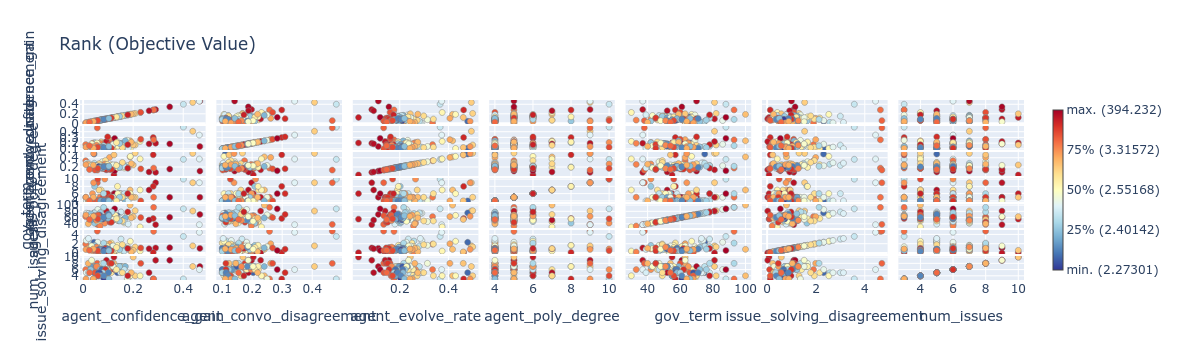

In [4]:
from optuna.visualization import plot_rank
plot_rank(study)